In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
num_rows_train = train.shape[0]
num_rows_test = test.shape[0]
full = pd.concat([train,test])

In [5]:
full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [6]:
full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
full.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [9]:
full = full.dropna(axis=1, how='any', thresh = train.shape[0]*0.6 )

In [10]:
full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [11]:
full = full.fillna(full.mean())

C:\Users\hamza\AppData\Local\Temp\ipykernel_5556\2442492679.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full = full.fillna(full.mean())


In [12]:
full = pd.get_dummies(full)

In [13]:
cov = full.corr()
features = [i for i in cov]
dropped = set() 
for i in range(len(features)) :
    for j in range(i+1,len(features)): #Avoid repetitions 
        f1=features[i]
        f2=features[j]
        if abs(cov[f1][f2]) > 0.9: #If the correlation between the features is > 0.9
            dropped.add(f1) #Add one of them to the set

full = full.drop(dropped, axis=1)

In [14]:
no_cor = [column for column in full if abs(full[column].corr(full["SalePrice"])) < 0.05]

full = full.drop(no_cor, axis=1)

In [15]:
full.shape

(2919, 148)

In [16]:
train = full.iloc[:num_rows_train]
test = test.iloc[num_rows_train:]

def outliers_iqr(ys):
    q_1, q_3 = np.percentile(ys, [25, 75]) 
    iqr = q_3 - q_1
    l_b = q_1 - (iqr * 1.5) 
    u_b = q_3 + (iqr * 1.5) 
    return np.where((ys > u_b) | (ys < l_b)) 

train_no_out = train 
for column in train:
    outliers = np.ndarray.tolist(outliers_iqr(train[column])[0]) 
    train_no_out = train.drop(outliers) 
train = train_no_out

In [17]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_Fa,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,0,1,0,0,1,0,1,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,0,1,0,0,1,0,1,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,0,1,0,0,1,0,1,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,0,1,0,0,1,0,1,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,...,0,1,0,0,1,0,1,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,...,0,1,0,0,1,0,1,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,...,0,1,0,0,1,0,1,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,...,0,1,0,0,1,0,1,0,1,0


In [18]:
train_set = train.sample(frac = 0.6)
rest = train.drop(train_set.index)
test_set = rest.sample(frac = 0.5)
validation_set = rest.drop(test_set.index)

In [19]:
train_set_X = train_set.drop(['SalePrice'],axis = 1)
train_set_Y = train_set['SalePrice'].tolist()
test_set_X = test_set.drop(['SalePrice'],axis = 1)
test_set_Y = test_set['SalePrice'].tolist()
validation_set_X = validation_set.drop(['SalePrice'],axis = 1)
validation_set_Y = validation_set['SalePrice'].tolist()

In [20]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model1 = LR().fit(train_set_X, train_set_Y)

Y_pred1 = model1.predict(validation_set_X)
print("Linear Regresssion")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred1))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred1))



Linear Regresssion
R2 Score:  0.9008019177863503
Mean Squarred Error:  522186440.9391569


In [21]:
coef1 = pd.DataFrame(zip(train_set.columns, model1.coef_))
coef1['Abs'] = coef1.loc[:,1]**2
coef1 = coef1.sort_values(by=['Abs'],ascending = False)
coef1.head()

,0,1,Abs
81,MasVnrType_Stone,37419.262946,1.400201e+09
48,Neighborhood_NAmes,34518.255887,1.191510e+09
53,Neighborhood_Somerst,26980.779164,7.279624e+08
68,RoofMatl_CompShg,26589.677099,7.070109e+08
95,BsmtQual_TA,-26042.561393,6.782150e+08


In [22]:
from sklearn.linear_model import Lasso
model2 = Lasso(max_iter=10000)
model2.fit(train_set_X, train_set_Y)

Y_pred2 = model2.predict(validation_set_X)
print("Lasso Regresssion")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred2))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred2))

Lasso Regresssion
R2 Score:  0.9013475776101534
Mean Squarred Error:  519314045.07225406


In [23]:
coef2 = pd.DataFrame(zip(train_set.columns, model2.coef_))
coef2['Abs'] = coef2.loc[:,1]**2
coef2 = coef1.sort_values(by=['Abs'],ascending = False)
coef2.head()

,0,1,Abs
81,MasVnrType_Stone,37419.262946,1.400201e+09
48,Neighborhood_NAmes,34518.255887,1.191510e+09
53,Neighborhood_Somerst,26980.779164,7.279624e+08
68,RoofMatl_CompShg,26589.677099,7.070109e+08
95,BsmtQual_TA,-26042.561393,6.782150e+08


In [24]:
coef2.tail()

,0,1,Abs
8,BsmtFinSF1,-1.272830,1.620097
7,MasVnrArea,-1.206490,1.455617
2,LotArea,0.472372,0.223135
28,PoolArea,-0.337483,0.113895
146,SaleCondition_Normal,0.000000,0.000000


In [25]:
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(train_set_X, train_set_Y)

Y_pred3 = model3.predict(validation_set_X)
print("Ridge Regresssion")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred3))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred3))

Ridge Regresssion
R2 Score:  0.9047180913227357
Mean Squarred Error:  501571398.0327748


In [26]:
coef3 = pd.DataFrame(zip(train_set.columns, model3.coef_))
coef3['Abs'] = coef3.loc[:,1]**2
coef3 = coef3.sort_values(by=['Abs'],ascending = False)
coef3.head()

,0,1,Abs
81,MasVnrType_Stone,31186.016136,9.725676e+08
48,Neighborhood_NAmes,30776.845328,9.472142e+08
53,Neighborhood_Somerst,22559.943546,5.089511e+08
43,Neighborhood_CollgCr,20115.758321,4.046437e+08
68,RoofMatl_CompShg,19374.951587,3.753887e+08


In [27]:
coef3.tail()

,0,1,Abs
28,PoolArea,-1.152833,1.329023
26,EnclosedPorch,-0.792026,0.627305
7,MasVnrArea,0.723028,0.522770
2,LotArea,0.471915,0.222704
146,SaleCondition_Normal,0.000000,0.000000


In [28]:
from sklearn.tree import DecisionTreeRegressor as DTR

model4 = DTR(random_state=0)
model4.fit(train_set_X, train_set_Y)

Y_pred4 = model4.predict(validation_set_X)
print("Decision Tree Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred4))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred4))

Decision Tree Regression
R2 Score:  0.7560235316543502
Mean Squarred Error:  1284311156.378277


In [29]:
model4 = DTR(random_state=0,max_depth = 10)
model4.fit(train_set_X, train_set_Y)

Y_pred4 = model4.predict(validation_set_X)
print("Decision Tree Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred4))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred4))

Decision Tree Regression
R2 Score:  0.7399201996711903
Mean Squarred Error:  1369080351.789102


In [30]:
from sklearn.ensemble import RandomForestRegressor as  RFR

model5 = RFR(random_state=0)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8714453834428312
Mean Squarred Error:  676721527.153163


In [31]:
from sklearn.ensemble import RandomForestRegressor as  RFR

model5 = RFR(random_state=0, max_depth = 10)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8681743504844845
Mean Squarred Error:  693940499.744134


In [32]:
model5 = RFR(random_state=0, max_depth = 20)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8712387590087214
Mean Squarred Error:  677809214.2883483


In [33]:
model5 = RFR(random_state=0, max_depth = 15)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8692425223106668
Mean Squarred Error:  688317559.9475331


In [34]:
model5 = RFR(random_state=0, max_depth = 5)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8379023016487018
Mean Squarred Error:  853294925.6436962


In [35]:
model5 = RFR(random_state=0, max_depth = 8)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8652563219339816
Mean Squarred Error:  709301229.6024406


In [36]:
model5 = RFR(random_state=0, max_depth = 12)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8702049369720711
Mean Squarred Error:  683251334.1140137


In [37]:
model5 = RFR(random_state=0, max_depth = 9)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8684065111942156
Mean Squarred Error:  692718387.6625787


In [38]:
model5 = RFR(random_state=0, max_depth = 11)
model5.fit(train_set_X, train_set_Y)

Y_pred5 = model5.predict(validation_set_X)
print("Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred5))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred5))

Random Forrest Regression
R2 Score:  0.8622252358897702
Mean Squarred Error:  725257102.9246503


In [39]:
from sklearn.neighbors import KNeighborsRegressor as KNR

model6 = KNR(n_neighbors=2)
model6.fit(train_set_X, train_set_Y)

Y_pred6 = model6.predict(validation_set_X)
print("K Neighbors Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred6))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred6))

K Neighbors Regression
R2 Score:  0.5180724102088143
Mean Squarred Error:  2536904416.775281


In [40]:
model6 = KNR(n_neighbors=10)
model6.fit(train_set_X, train_set_Y)

Y_pred6 = model6.predict(validation_set_X)
print("K Neighbors Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred6))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred6))

K Neighbors Regression
R2 Score:  0.5524305591282528
Mean Squarred Error:  2356040441.372434


In [41]:
model6 = KNR(n_neighbors=20)
model6.fit(train_set_X, train_set_Y)

Y_pred6 = model6.predict(validation_set_X)
print("K Neighbors Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred6))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred6))

K Neighbors Regression
R2 Score:  0.5048108371833464
Mean Squarred Error:  2606714371.4123974


In [42]:
model6 = KNR(n_neighbors=2, weights = 'distance')
model6.fit(train_set_X, train_set_Y)

Y_pred6 = model6.predict(validation_set_X)
print("K Neighbors Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred6))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred6))

K Neighbors Regression
R2 Score:  0.5312140017443462
Mean Squarred Error:  2467726054.0581913


In [43]:
model6 = KNR(n_neighbors=10, weights = 'distance')
model6.fit(train_set_X, train_set_Y)

Y_pred6 = model6.predict(validation_set_X)
print("K Neighbors Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred6))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred6))

K Neighbors Regression
R2 Score:  0.5627924075782802
Mean Squarred Error:  2301494863.0414224


In [44]:
model6 = KNR(n_neighbors=20, weights = 'distance')
model6.fit(train_set_X, train_set_Y)

Y_pred6 = model6.predict(validation_set_X)
print("K Neighbors Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred6))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred6))

K Neighbors Regression
R2 Score:  0.5297964060220678
Mean Squarred Error:  2475188388.4943833


In [45]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.preprocessing import StandardScaler as SS

scaler1 = SS()
scaler1.fit(train_set_X)
train_set_X_scaled = scaler1.transform(train_set_X)
scaler2 = SS()
scaler2.fit(validation_set_X)
validation_set_X_scaled = scaler2.transform(validation_set_X)


model7 = LogR(random_state=0, max_iter = 5000)
model7.fit(train_set_X_scaled, train_set_Y)

Y_pred7 = model7.predict(validation_set_X_scaled)
print("Logistic Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred7))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred7))

Logistic Regression
R2 Score:  0.5983348063493039
Mean Squarred Error:  2114396904.0636704


In [46]:
scaler1 = SS()
scaler1.fit(train_set_X)
train_set_X_scaled = scaler1.transform(train_set_X)
scaler2 = SS()
scaler2.fit(validation_set_X)
validation_set_X_scaled = scaler2.transform(validation_set_X)


model7 = LogR(random_state=0, max_iter = 5000, penalty = 'none')
model7.fit(train_set_X_scaled, train_set_Y)

Y_pred7 = model7.predict(validation_set_X_scaled)
print("Logistic Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred7))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred7))

Logistic Regression
R2 Score:  0.6408749374477107
Mean Squarred Error:  1890462336.3820224


In [47]:
#takes a bit of time
scaler1 = SS()
scaler1.fit(train_set_X)
train_set_X_scaled = scaler1.transform(train_set_X)
scaler2 = SS()
scaler2.fit(validation_set_X)
validation_set_X_scaled = scaler2.transform(validation_set_X)


model7 = LogR(random_state=0, max_iter = 5000, solver = 'saga')
model7.fit(train_set_X_scaled, train_set_Y)

Y_pred7 = model7.predict(validation_set_X_scaled)
print("Logistic Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred7))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred7))

Logistic Regression
R2 Score:  0.6117389967277722
Mean Squarred Error:  2043836200.5580525


In [48]:
model = RFR(random_state=0, max_depth = 11)
model.fit(train_set_X, train_set_Y)

Y_pred = model.predict(validation_set_X)
print("Best: Random Forrest Regression")
print("R2 Score: " ,r2_score(validation_set_Y, Y_pred))
print("Mean Squarred Error: " ,mean_squared_error(validation_set_Y, Y_pred))

Best: Random Forrest Regression
R2 Score:  0.8622252358897702
Mean Squarred Error:  725257102.9246503


<BarContainer object of 5 artists>

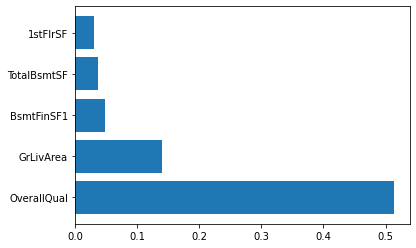

In [49]:
coef4 = pd.DataFrame(zip(train_set.columns, model.feature_importances_))
coef4 = coef4.sort_values(coef4.columns[1],ascending = False)
coef_done = coef4.head(5)

plt.barh(coef_done[0], coef_done[1])

In [50]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_set_X)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], train_set_X.iloc[0,:])

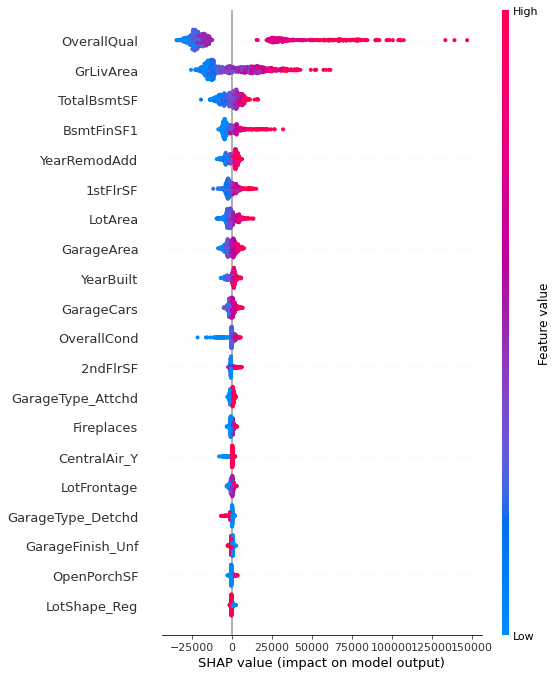

In [51]:
shap.summary_plot(shap_values, train_set_X)

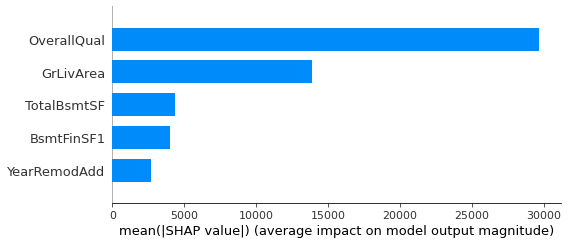

In [52]:
shap.summary_plot(shap_values, train_set_X, plot_type='bar', max_display = 5)

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


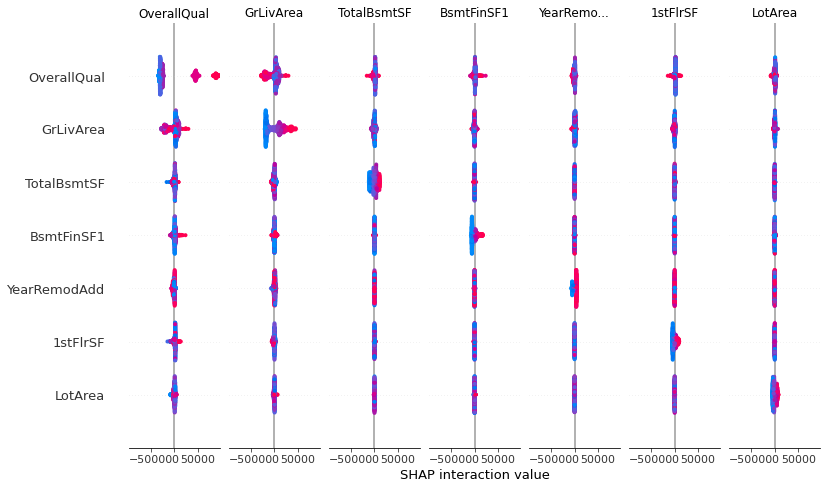

In [63]:
shap_interaction = explainer.shap_interaction_values(train_set_X)
shap.summary_plot(shap_interaction, train_set_X)

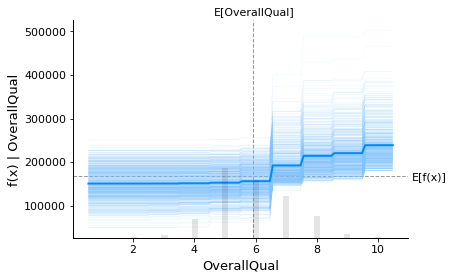

In [54]:
shap.plots.partial_dependence(
    "OverallQual", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

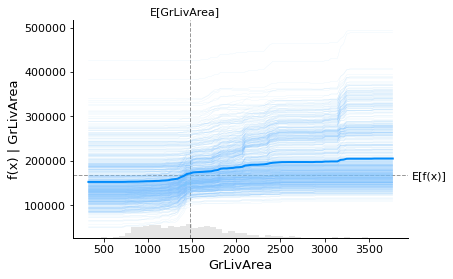

In [55]:
shap.plots.partial_dependence(
    "GrLivArea", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

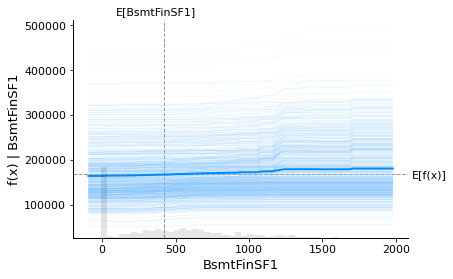

In [56]:
shap.plots.partial_dependence(
    "BsmtFinSF1", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

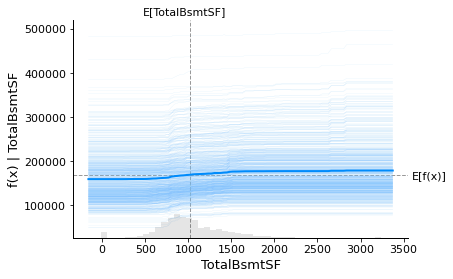

In [57]:
shap.plots.partial_dependence(
    "TotalBsmtSF", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

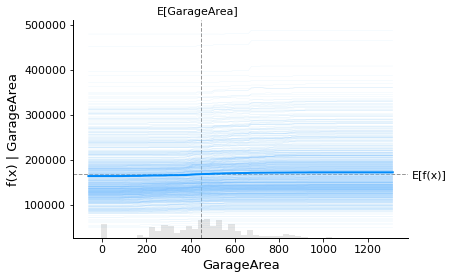

In [58]:
shap.plots.partial_dependence(
    "GarageArea", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

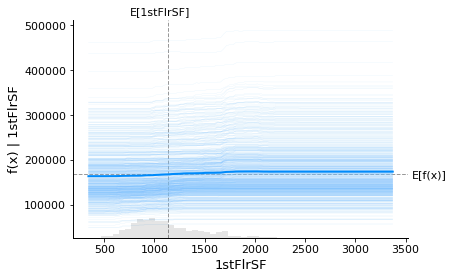

In [59]:
shap.plots.partial_dependence(
    "1stFlrSF", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

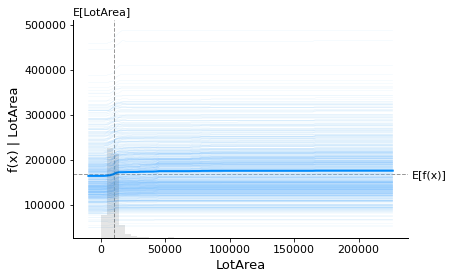

In [60]:
shap.plots.partial_dependence(
    "LotArea", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

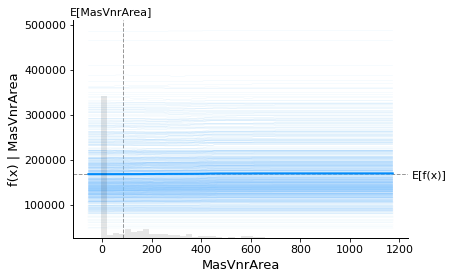

In [61]:
shap.plots.partial_dependence(
    "MasVnrArea", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)

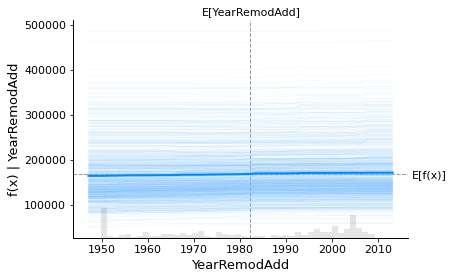

In [62]:
shap.plots.partial_dependence(
    "YearRemodAdd", model.predict, train_set_X, ice=True,
    model_expected_value=True, feature_expected_value=True
)